# 4. Interaction & Polynomial Features

**Goal:** Create domain-driven feature interactions to capture non-linear relationships.

**Dataset:** UCI Adult Census Income

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
           'hours-per-week', 'native-country', 'income']

df = pd.read_csv('../data/raw/adult.data', names=columns, na_values=' ?', skipinitialspace=True)
df.dropna(inplace=True)
df['target'] = (df['income'] == '>50K').astype(int)

print(f"Dataset: {df.shape}")

Dataset: (32561, 16)


## 1. Manual Domain-Driven Interactions

In [2]:
# Create meaningful interactions
df['age_x_hours'] = df['age'] * df['hours-per-week']
df['education_x_age'] = df['education-num'] * df['age']
df['capital_total'] = df['capital-gain'] - df['capital-loss']
df['has_capital'] = (df['capital_total'] > 0).astype(int)

# Select numeric features
feature_cols = ['age', 'education-num', 'hours-per-week', 'capital-gain', 
                'age_x_hours', 'education_x_age', 'capital_total', 'has_capital']

X = df[feature_cols]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 2. Baseline (No Interactions)

In [3]:
base_features = ['age', 'education-num', 'hours-per-week', 'capital-gain']
rf_base = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_base.fit(X_train[base_features], y_train)
base_score = rf_base.score(X_test[base_features], y_test)

print(f"Baseline (4 features): {base_score:.4f}")

Baseline (4 features): 0.8041


## 3. With Manual Interactions

In [4]:
rf_manual = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_manual.fit(X_train, y_train)
manual_score = rf_manual.score(X_test, y_test)

print(f"With Manual Interactions (8 features): {manual_score:.4f}")
print(f"Improvement: {(manual_score - base_score):.4f}")

With Manual Interactions (8 features): 0.8184
Improvement: 0.0143


## 4. Automated Polynomial Features

In [5]:
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
X_train_poly = poly.fit_transform(X_train[base_features])
X_test_poly = poly.transform(X_test[base_features])

print(f"Polynomial features created: {X_train_poly.shape[1]}")

rf_poly = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, max_depth=10)
rf_poly.fit(X_train_poly, y_train)
poly_score = rf_poly.score(X_test_poly, y_test)

print(f"Polynomial Features: {poly_score:.4f}")

Polynomial features created: 10


Polynomial Features: 0.8257


## 5. Comparison

,Method,Features,Accuracy
0,Baseline,4,0.804084
1,Manual Interactions,8,0.818363
2,Polynomial (auto),10,0.825733


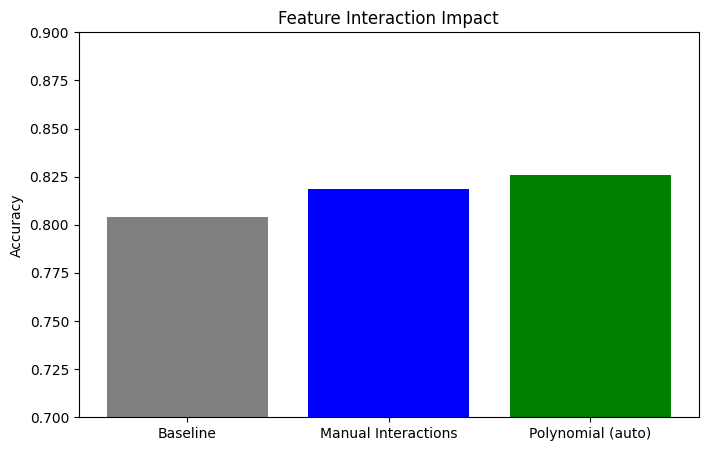


🏆 Manual domain features often outperform blind polynomial expansion.


In [6]:
results = pd.DataFrame({
    'Method': ['Baseline', 'Manual Interactions', 'Polynomial (auto)'],
    'Features': [4, 8, X_train_poly.shape[1]],
    'Accuracy': [base_score, manual_score, poly_score]
})

display(results)

plt.figure(figsize=(8, 5))
plt.bar(results['Method'], results['Accuracy'], color=['gray', 'blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Feature Interaction Impact')
plt.ylim(0.7, 0.9)
plt.show()

print("\n🏆 Manual domain features often outperform blind polynomial expansion.")